<font size="5">Reddit Sentiment Analysis</font>

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("aita_clean.csv") #By Elle O'Brien
df["body"].fillna("", inplace = True)
df

,id,timestamp,title,body,edited,verdict,score,num_comments,is_asshole
0,1ytxov,1.393279e+09,[AITA] I wrote an explanation in TIL and came ...,[Here is the post in question](http://www.redd...,False,asshole,52,13.0,1
1,1yu29c,1.393281e+09,[AITA] Threw my parent's donuts away,"My parents are diabetic, morbidly obese, and a...",1393290576.0,asshole,140,27.0,1
2,1yu8hi,1.393285e+09,I told a goth girl she looked like a clown.,I was four.,False,not the asshole,74,15.0,0
3,1yuc78,1.393287e+09,[AItA]: Argument I had with another redditor i...,http://www.reddit.com/r/HIMYM/comments/1vvfkq/...,1393286962.0,everyone sucks,22,3.0,1
4,1yueqb,1.393288e+09,[AITA] I let my story get a little long and bo...,,False,not the asshole,6,4.0,0
...,...,...,...,...,...,...,...,...,...
97623,ex94w5,1.580577e+09,AITA for telling my sister she is being a spoi...,My sister(17F) and I(15M) are white kids born ...,1580585457.0,not the asshole,16,23.0,0
97624,ex970f,1.580577e+09,AITA for telling my husband to f* off after he...,My husband (28M) and I (32F) are married for a...,1580584475.0,not the asshole,1373,304.0,0
97625,ex9dwo,1.580578e+09,AITA for attempting to keep my students out of...,Upfront apologies for formatting. I’m also try...,False,not the asshole,4,15.0,0
97626,ex9egs,1.580578e+09,WIBTA if I left my brothers fate up to the state?,A little back story my mom is a drug addict an...,False,not the asshole,280,140.0,0


In [3]:
p = np.mean(df['is_asshole']) #how many of these posts were assholes proportionally
data = {"Label": ["A-hole", "Not A-hole"], "Proportion": [p, 1-p]} #Label
pd.DataFrame(data).round(2)  

,Label,Proportion
0,A-hole,0.27
1,Not A-hole,0.73


In [4]:
df["date"] = pd.to_datetime(df["timestamp"], unit="s")
df["month"] = pd.DatetimeIndex(df["date"]).month

In [5]:
dfd = (df[["month", "is_asshole"]]
       .groupby("month", as_index = False)
       .aggregate(mean = ("is_asshole", np.mean),
                  size = ("is_asshole", np.size)))
dfd

,month,mean,size
0,1,0.261313,11867
1,2,0.253683,4616
2,3,0.280572,6640
3,4,0.259947,6786
4,5,0.276957,6705
5,6,0.269114,7246
6,7,0.270262,9513
7,8,0.272497,8701
8,9,0.286528,7371
9,10,0.293180,8343


Text(0.5, 1.0, 'Reddit A-holes Throughout the Year')

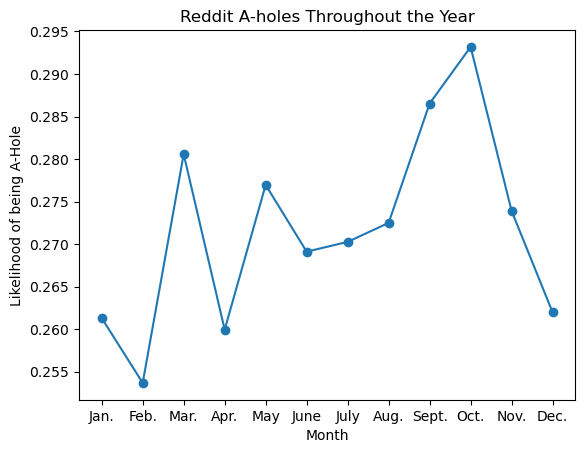

In [6]:
plt.scatter(dfd["month"], dfd["mean"]);
plt.plot(dfd["month"], dfd["mean"])
plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels=["Jan.", "Feb.", "Mar.", "Apr.", "May", "June", "July", "Aug.", "Sept.", "Oct.", "Nov.", "Dec."])
plt.xlabel("Month")
plt.ylabel("Likelihood of being A-Hole")
plt.title("Reddit A-holes Throughout the Year")

In [7]:
dfp = pd.read_csv("positive-words.csv") #By Mkulakowski2
dfn = pd.read_csv("negative-words.csv")
dfp

,Words
0,a+
1,abound
2,abounds
3,abundance
4,abundant
...,...
2001,youthful
2002,zeal
2003,zenith
2004,zest


In [8]:
dfn

,Words
0,2-faced
1,2-faces
2,abnormal
3,abolish
4,abominable
...,...
4778,zaps
4779,zealot
4780,zealous
4781,zealously


Now we will take a randomized sample of 20 words from both the "positive" and "negative" dataset.

In [9]:
n_sample = dfn.sample(n = 20)
p_sample = dfp.sample(n = 20)

Get a list of just the words from each "Words" column. We'll make sure they're ready to be used
in Regex fashion as well

In [10]:
positive_list = p_sample["Words"].tolist()
negative_list = n_sample["Words"].tolist()
p_string = '|'.join(positive_list)
n_string = '|'.join(negative_list)
n = re.compile(n_string)
p = re.compile(p_string)
p_match = df["body"].str.contains(p, regex=True)
n_match = df["body"].str.contains(n, regex=True)

In [11]:
p_proportion = df["is_asshole"] == 1
np.round(np.sum(np.logical_and(p_proportion, p_match)) / np.sum(p_match), 2) #Test case #.34 #.32

0.27

In [12]:
n_proportion = df["is_asshole"] == 1
np.round(np.sum(np.logical_and(n_proportion, n_match)) / np.sum(n_match), 2)

0.26

The overall proportion was a .27 and this is roughly the same, therefore the correlation is minimal if there is one at all. There are some other factors we can test, so let's test the number of characters in a post instead. The idea here is perhaps longer posts come off as ranting or more irritable, alternatively they could be better explained and seemingly less petty.

In [13]:
newdf = df[df["body"].apply(lambda x: len(x) > 15000)]

In [14]:
newp = np.mean(newdf['is_asshole']) 
data = {"Label": ["A-hole", "Not A-hole"], "Proportion": [newp, 1-newp]}
newp_df = pd.DataFrame(data).round(2) 
newp_df

,Label,Proportion
0,A-hole,0.43
1,Not A-hole,0.57


In [15]:
@interact(
    r = FloatSlider(value=0.0, min=100.0, max=17500.0, step=1, description = "#Of Chars")
)
def plots(r):
    x = df[df["body"].apply(lambda x: len(x) > r)]
    newp = np.mean(x['is_asshole']) 
    plt.scatter([1, 0], [newp, 1-newp], c = ["Red", "Blue"]);
    plt.ylim([0, 1])
    plt.xlim([-1, 2])
    plt.xticks([1, 0], newp_df["Label"])
    plt.title("Do A-Holes Talk Too Much?")

interactive(children=(FloatSlider(value=100.0, description='#Of Chars', max=17500.0, min=100.0, step=1.0), Out…

Conclusion? There may be some vague correlation, but it more likely seems as though neither of these variables
have been very precise/accurate indicators of the likelihood of being voted an A-Hole